# Plotting the weather data 

Running in the 24hr environment kernel 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
hour = pd.read_csv('/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Church_farm/Oct22_Aug23_Weather_Data/Hourly_Oct22_Aug23_weather.csv')
ten_min = pd.read_csv('/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Church_farm/Oct22_Aug23_Weather_Data/10min_Oct22_Aug23_weather.csv')
daily = pd.read_csv('/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Church_farm/Oct22_Aug23_Weather_Data/Daily_Oct22_Aug23_weather.csv')

In [4]:
def process_files(file):
        # Rename the header
        file.rename(columns={'Timestamp (UTC+0)': 'Time'}, inplace=True)
        
        # Convert the 'Date' column to datetime format
        file['Time'] = pd.to_datetime(file['Time'], format='%d/%m/%Y %H:%M')

weather_files = [hour, ten_min, daily]

for file in weather_files:
    process_files(file)

daily['AirTC_TMn'] = pd.to_datetime(daily['AirTC_TMn'], format='%d/%m/%Y %H:%M')
daily['AirTC_TMx'] = pd.to_datetime(daily['AirTC_TMx'], format='%d/%m/%Y %H:%M')

## Daily plot

Text(0, 0.5, 'Temperature (°C)')

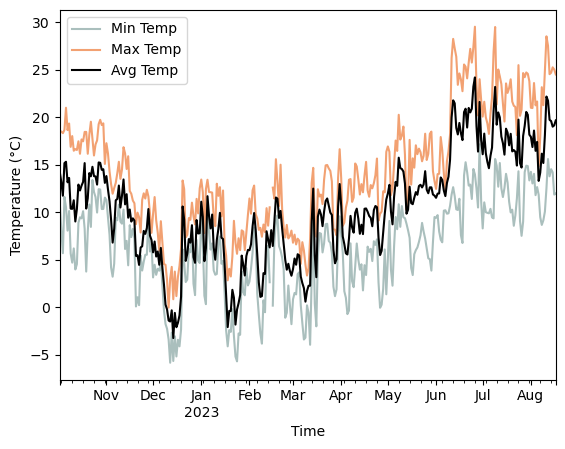

In [5]:
w  = daily.plot(x='Time',
            y=['Min_AirTC', 'Max_AirTC', 'PTemp_C_Avg'],
            kind='line',
            color = ['#AABFBD', '#F2A172', 'black'],
            label = ['Min Temp', 'Max Temp', 'Avg Temp'],
            )

w.set_xlabel('Time')
w.set_ylabel('Temperature (°C)')


## Hourly plots

Plotting the average of each day because otherwise it'stoo much data over so many months. 

Not aesthetic but a way to visualise all the variables

In [12]:
hour['Date'] = hour['Time'].dt.date #add a column for date
hour['Date'] = pd.to_datetime(hour['Date'])

# Specify the columns you don't want to include in the aggregation
columns_to_exclude = ['Date', 'Time']

# Get the list of columns you want to include in the aggregation
columns_to_include = [col for col in hour.columns if col not in columns_to_exclude]

# Perform the aggregation on the selected columns
group_hour = hour.groupby('Date')[columns_to_include].agg(['mean', 'sem'])


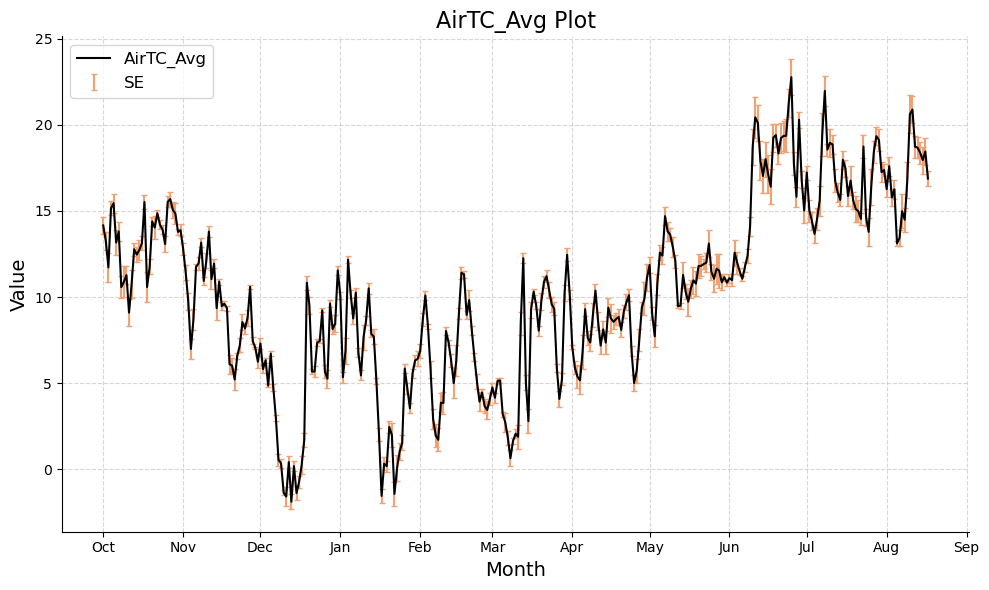

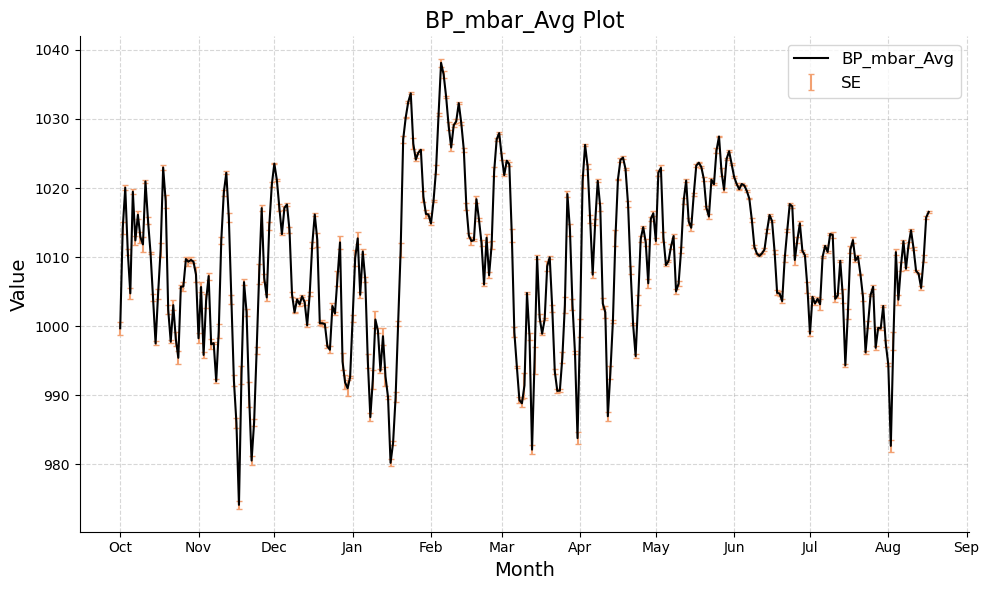

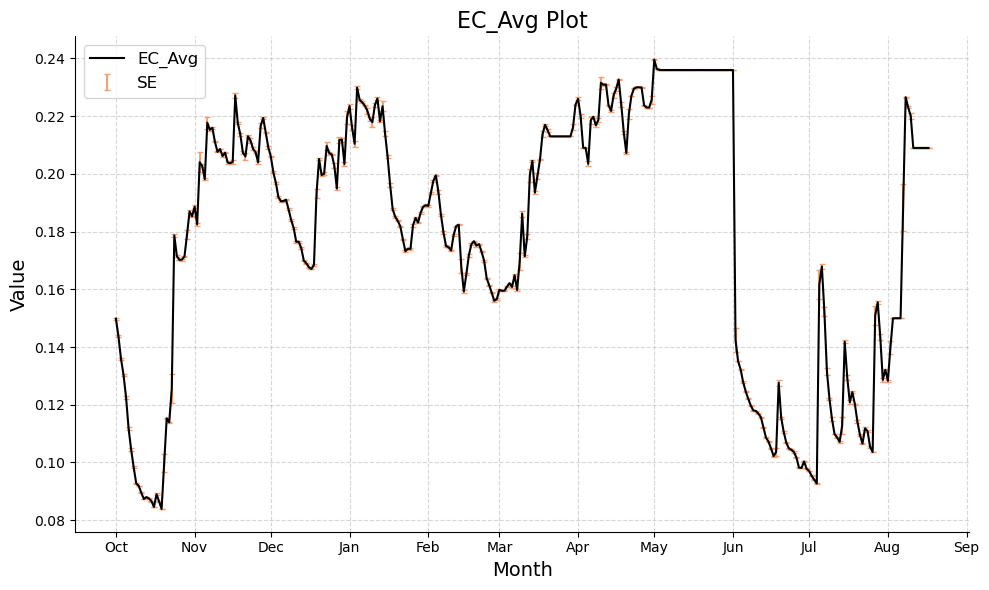

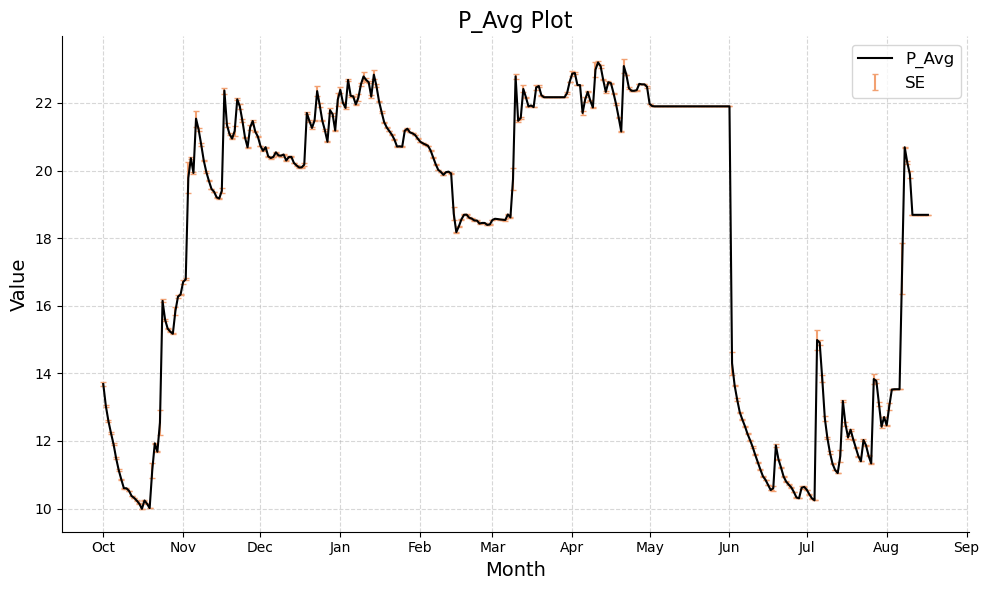

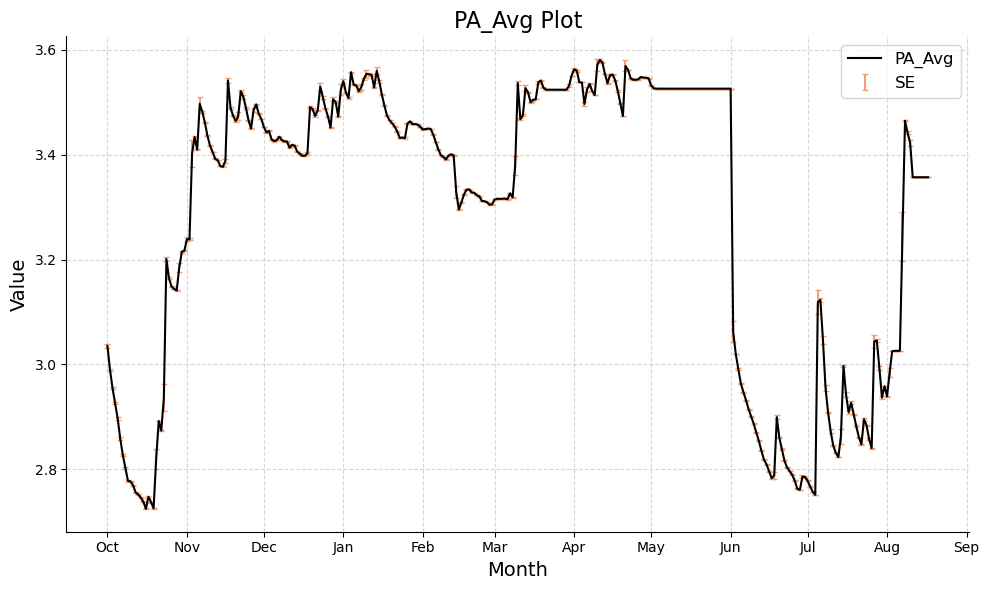

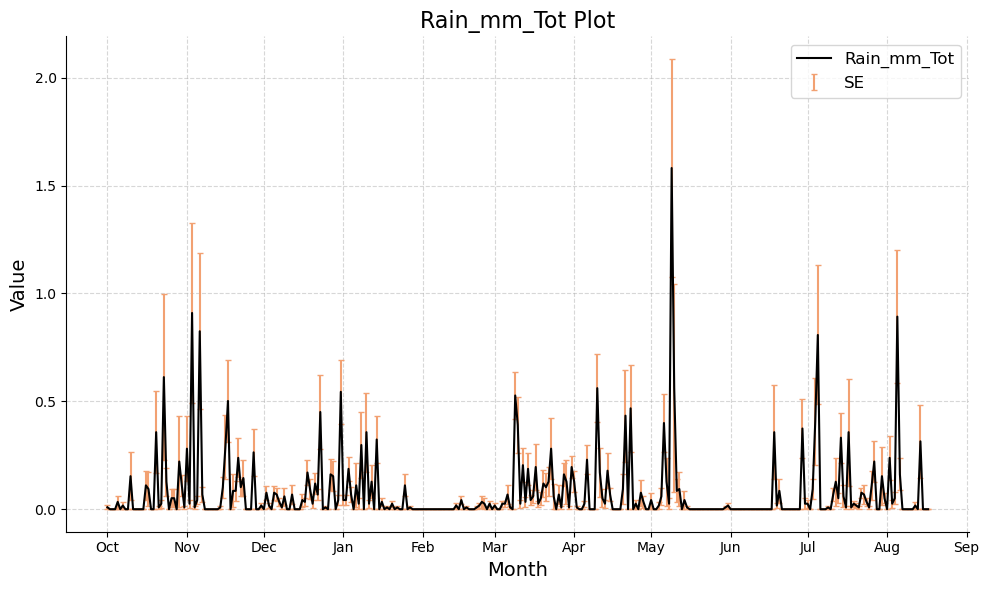

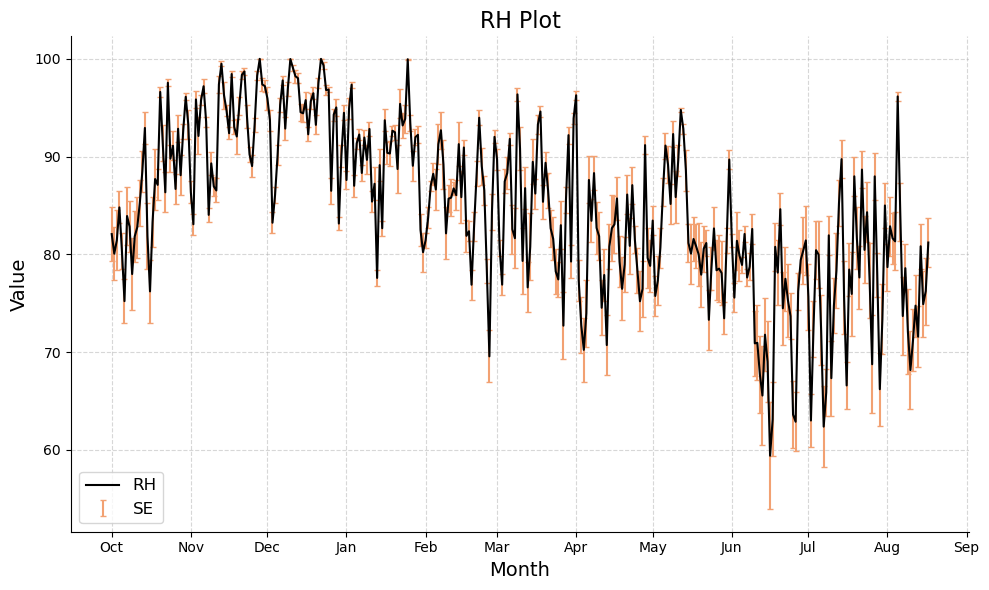

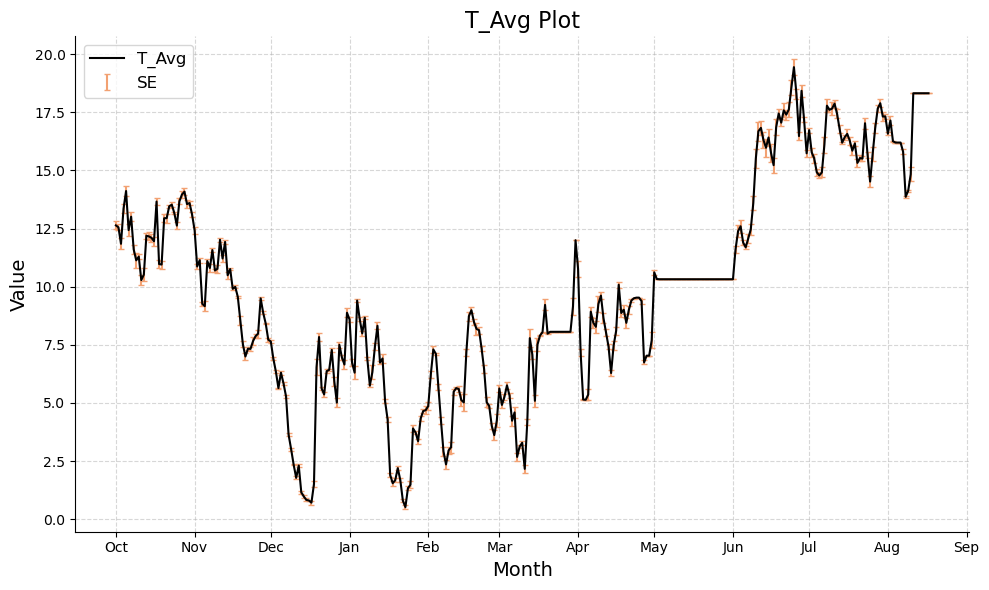

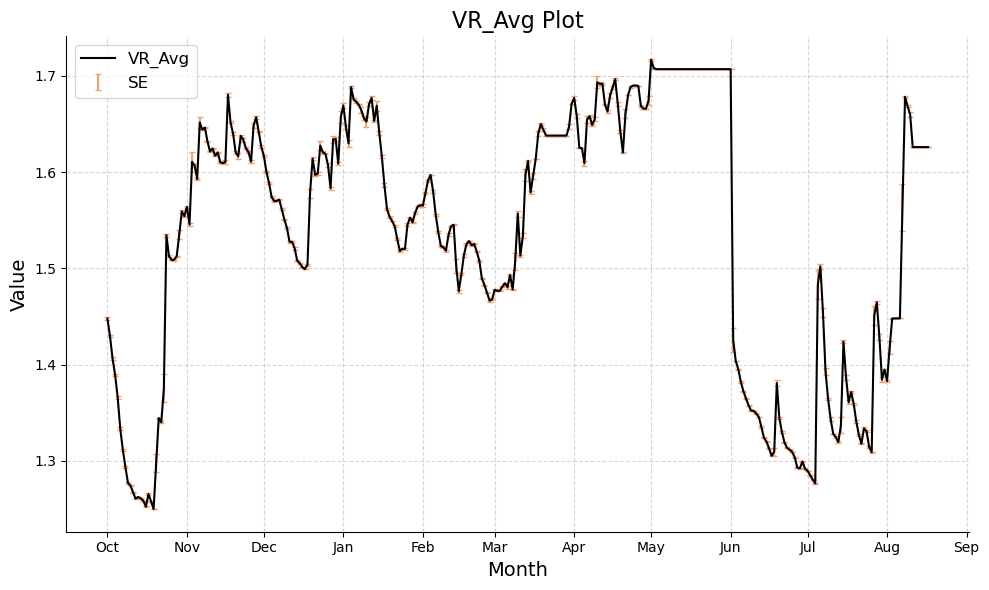

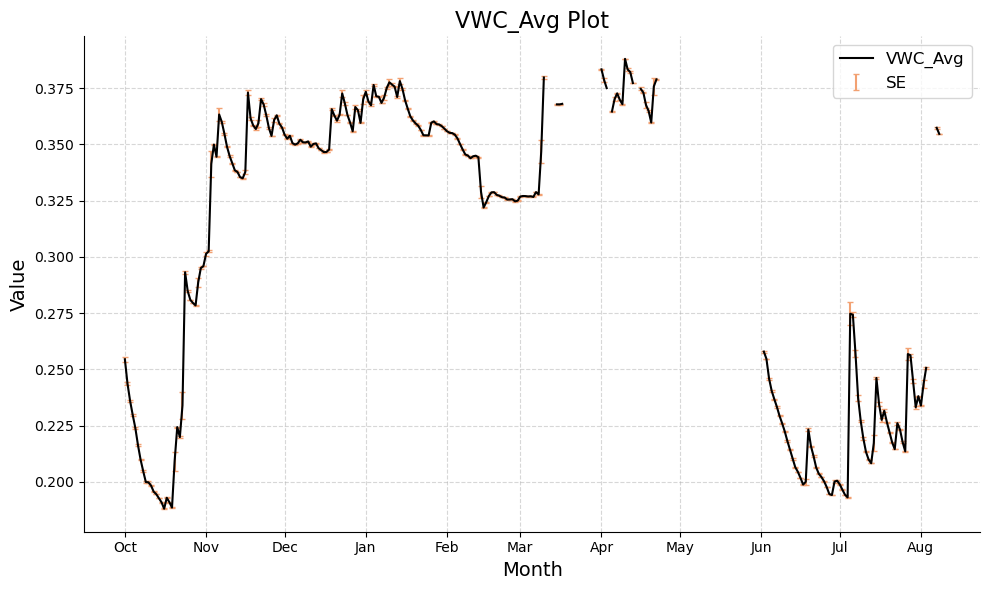

In [15]:
# Get the first level of the column names
variables = group_hour.columns.get_level_values(0).unique()

# Create a figure and axis object for each variable
for variable in variables:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the standard error as error bars
    ax.errorbar(group_hour.index, group_hour[(variable, 'mean')], yerr=group_hour[(variable, 'sem')], fmt='none', ecolor='#F2A172', capsize=2, label='SE')

    # Plot the mean line
    ax.plot(group_hour.index, group_hour[(variable, 'mean')], linestyle='-', markersize=5, label=variable, color = 'black')

    # Format the x-axis to display dates nicely
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Set labels and title
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)
    ax.set_title(f'{variable} Plot', fontsize=16)

    # Add legend
    ax.legend(fontsize=12)

    # Set grid
    ax.grid(True, linestyle='--', alpha=0.5)

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show plot
    plt.tight_layout()
     # Save the plot to a file
    plt.savefig(f'Oct22_Aug23_Weather_Data/{variable}_plot.png')
    plt.show()
   


## To do - Look into the 10 minute data 

Could plot daily average again, or hourly?

In [17]:
ten_min['Date'] = ten_min['Time'].dt.date #add a column for date
ten_min['Date'] = pd.to_datetime(ten_min['Date'])

# Specify the columns you don't want to include in the aggregation
columns_to_exclude = ['Date', 'Time']

# Get the list of columns you want to include in the aggregation
columns_to_include = [col for col in ten_min.columns if col not in columns_to_exclude]

# Perform the aggregation on the selected columns
group_min = ten_min.groupby('Date')[columns_to_include].agg(['mean', 'sem'])

group_min

Gust_Max               Mean_WD             Mean_WS            \
                mean       sem        mean       sem      mean       sem   
Date                                                                       
2022-10-01  4.571517  0.083206  245.174126  0.900408  4.523846  0.086917   
2022-10-02  2.340083  0.073373  267.214583  2.856880  2.239646  0.078465   
2022-10-03  2.413354  0.075084  218.151389  2.008613  2.379486  0.078889   
2022-10-04  5.459278  0.114442  206.554167  1.135872  5.434750  0.115903   
2022-10-05  6.708965  0.195684  223.409028  1.926690  6.579549  0.203187   
...              ...       ...         ...       ...       ...       ...   
2023-08-13  3.431896  0.087471  219.719444  1.160447  3.332694  0.092877   
2023-08-14  3.378076  0.072081  196.203472  1.471478  3.334472  0.074849   
2023-08-15  1.962993  0.083255  215.742292  5.642141  1.877965  0.087731   
2023-08-16  1.749424  0.072956  121.659917  8.300810  1.731257  0.073793   
2023-08-17  2.943243  0.076430   59.212639  0.720357  2.912514  0.077133   

                QR_Avg            WSDiag       
                  mean        sem   mean  sem  
Date                                           
2022-10-01  314.402483  36.078298    0.0  0.0  
2022-10-02  266.284951  32.191039    0.0  0.0  
2022-10-03  235.493722  27.229936    0.0  0.0  
2022-10-04  133.357667  15.586726    0.0  0.0  
2022-10-05  166.917972  23.239358    0.0  0.0  
...                ...        ...    ...  ...  
2023-08-13  404.234625  38.174579    0.0  0.0  
2023-08-14  351.385063  39.455611    0.0  0.0  
2023-08-15  454.750174  48.488967    0.0  0.0  
2023-08-16  469.903972  45.935430    0.0  0.0  
2023-08-17  383.110187  38.618551    0.0  0.0  

[321 rows x 10 columns]

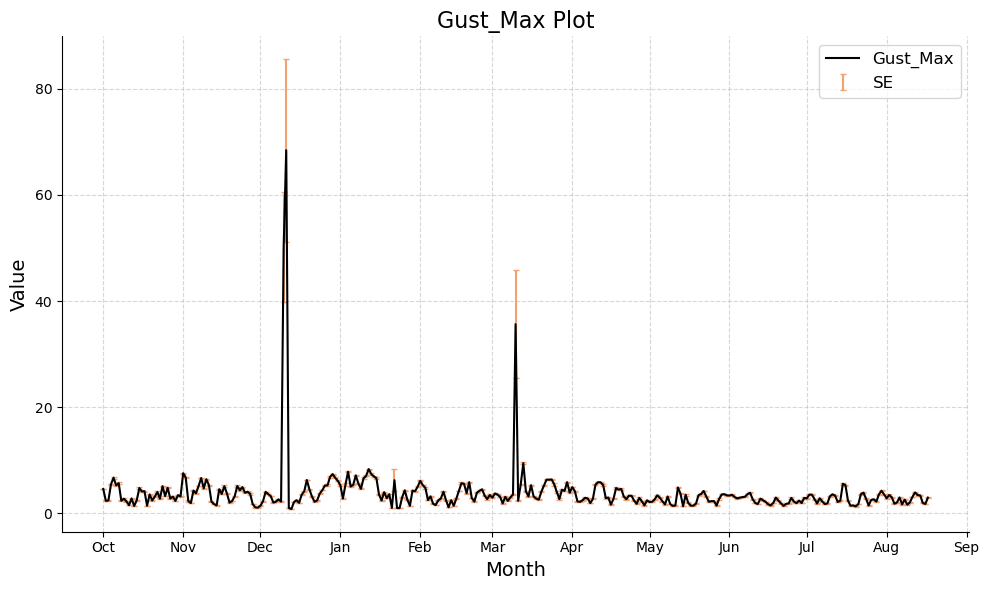

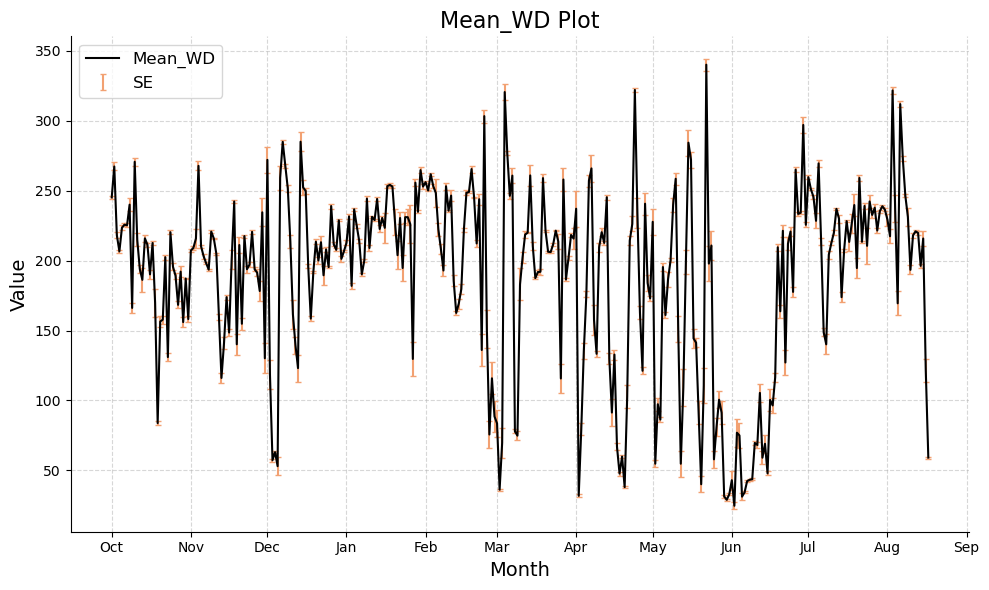

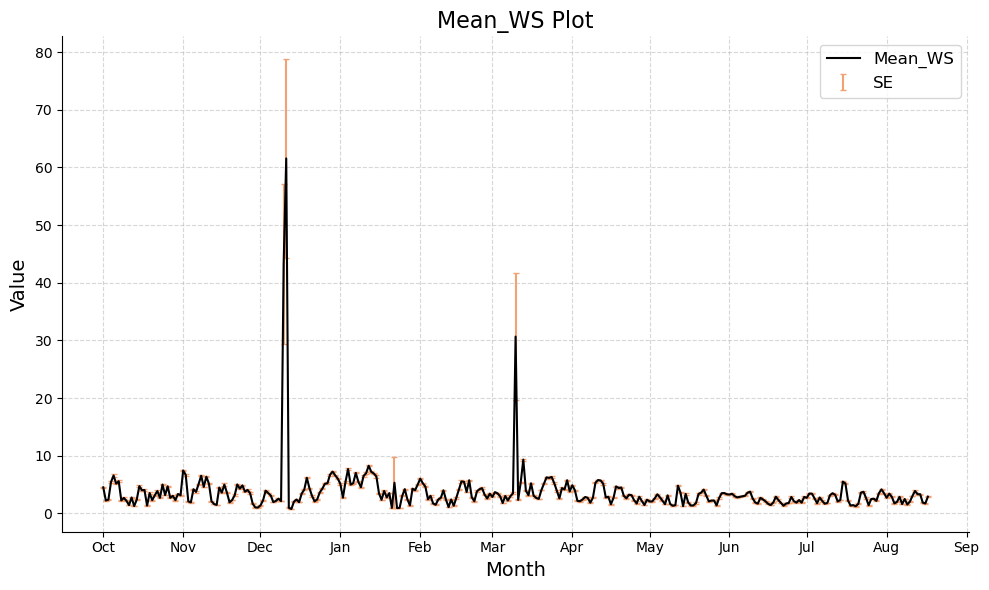

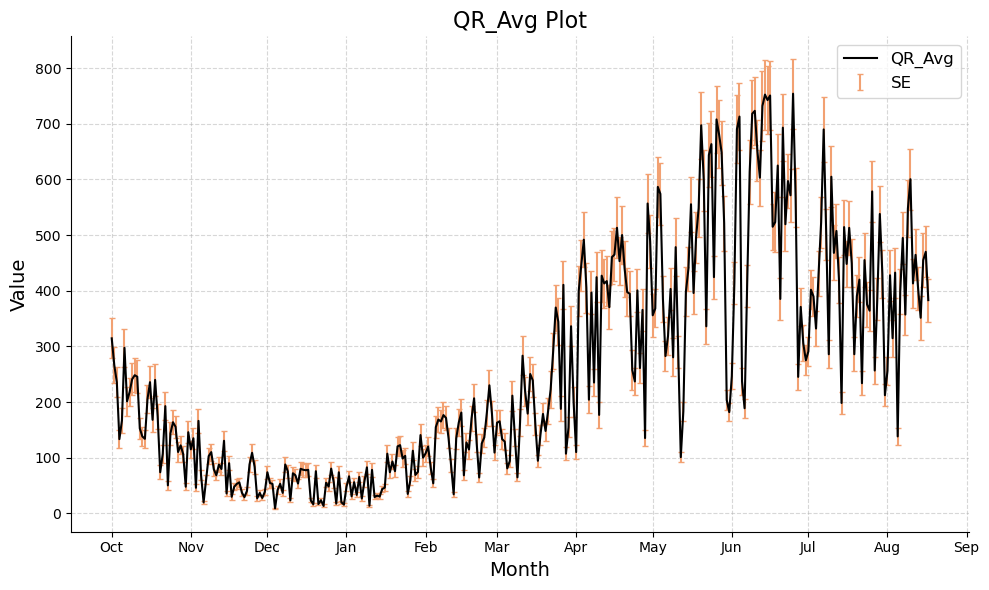

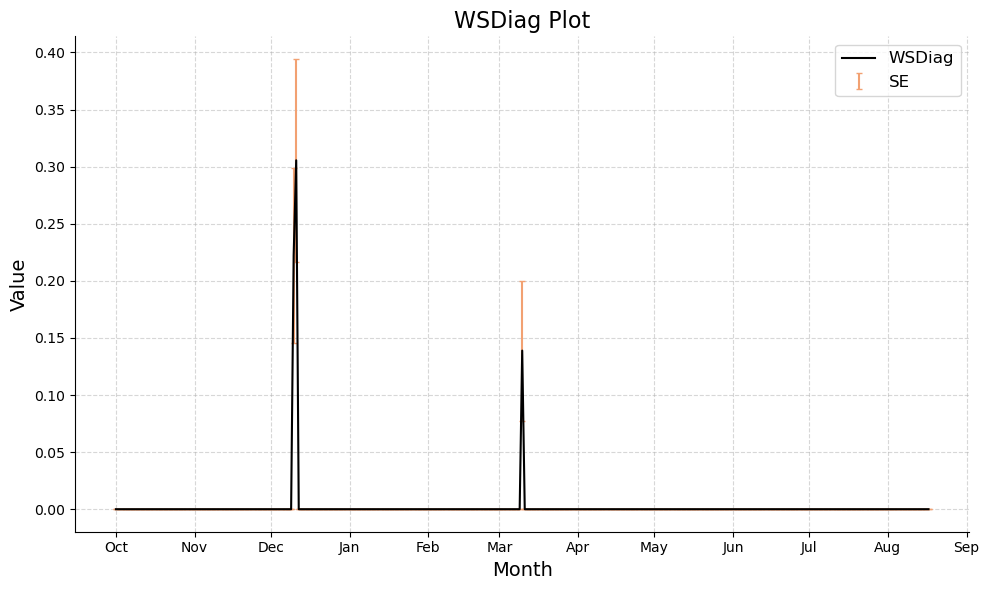

In [18]:
# Get the first level of the column names
variables = group_min.columns.get_level_values(0).unique()

# Create a figure and axis object for each variable
for variable in variables:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the standard error as error bars
    ax.errorbar(group_min.index, group_min[(variable, 'mean')], yerr=group_min[(variable, 'sem')], fmt='none', ecolor='#F2A172', capsize=2, label='SE')

    # Plot the mean line
    ax.plot(group_min.index, group_min[(variable, 'mean')], linestyle='-', markersize=5, label=variable, color = 'black')

    # Format the x-axis to display dates nicely
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Set labels and title
    ax.set_xlabel('Month', fontsize=14)

    ax.set_ylabel('Value', fontsize=14)
    ax.set_title(f'{variable} Plot', fontsize=16)

    # Add legend
    ax.legend(fontsize=12)

    # Set grid
    ax.grid(True, linestyle='--', alpha=0.5)

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show plot
    plt.tight_layout()
    plt.savefig(f'Oct22_Aug23_Weather_Data/{variable}_plot.png')
    plt.show()